### Chapter 02. 붓꽃 데이터 분석

In [2]:
import pandas as pd

iris = pd.read_csv('Dataset/iris.csv')
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info() # 결측치가 있는지 확인하기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


    Species는 문자열이고 object라고 표현하고 있다.

In [4]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
iris.isna().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

✅ **duplicated()**
- 이전에 나온 적이 있는 중복 행인지?“를 판단해서 True 또는 False를 반환한다.

In [8]:
iris.duplicated().sum()

np.int64(1)

In [9]:
mask = iris.duplicated()

# False에 해당하는 행은 모두 건너뛰고 True에 해당하는 행만 출력
iris[mask]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
142,5.8,2.7,5.1,1.9,virginica


In [10]:
mask = (iris['SepalLength'] == 5.8) & (iris['PetalWidth'] == 1.9)

iris[mask]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


    101번 행과 142번의 행이 중복되었음을 알 수 있다.

✅ drop()
- 특정 행 또는 열을 제거할 때 사용

✅ dropna()
- 결측값(NaN)이 포함된 행이나 열을 제거할 때 사용

✅ drop_duplicates()
- 중복된 데이터를 제거해서 고유한 행만 남기고 싶을 때 사용

In [11]:
iris = iris.drop_duplicates()
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
iris.duplicated().sum() # 중복된 값 없음

np.int64(0)

In [13]:
iris.groupby('Species').sum()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,323.6,146.0,272.5,99.4


    범주형 데이터로 그룹핑을 해야 유의미한 결과를 얻을 수 있다.

In [14]:
iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


> plot 함수를 활용한 시각화

In [15]:
# 컬럼을 뽑아내는 두 가지 방식
# iris['SepalLength']
# iris.SepalLength

In [16]:
iris.SepalLength

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLength, Length: 149, dtype: float64

> 막대 그래프 그리기

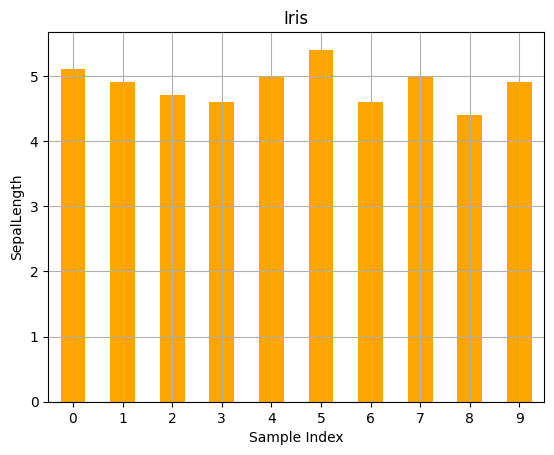

In [17]:
import matplotlib.pyplot as plt

plt.title('Iris')

iris.SepalLength[:10].plot(kind='bar', rot=0, color='orange') # 10개의 샘플 추출
plt.xlabel('Sample Index')
plt.ylabel('SepalLength')
plt.grid()

In [20]:
iris.groupby('Species').mean()

,SepalLength,SepalWidth,PetalLength,PetalWidth
Species,,,,
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.604082,2.979592,5.561224,2.028571


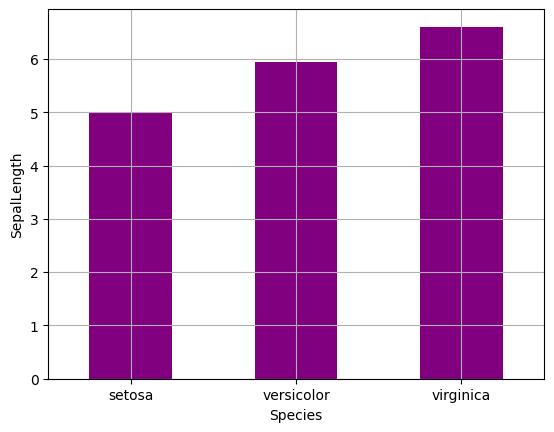

In [21]:
a = iris.groupby('Species').mean()

a.SepalLength.plot(kind='bar', rot=0, color='purple')

plt.ylabel('SepalLength')
plt.grid(True)

    그룹핑을 하면 x축이 자동으로 그룹핑 기준 컬럼으로 지정된다.

In [31]:
iris

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


> 히스토그램 그리기

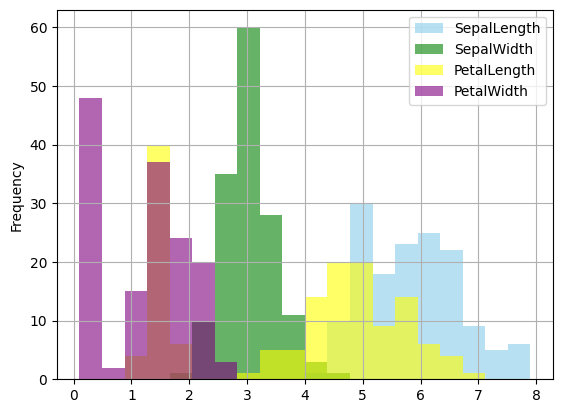

In [30]:
iris.plot(kind='hist', bins=20, alpha=0.6, color=['skyblue', 'green','yellow','purple'])

plt.grid(True)

> boxplot 그리기

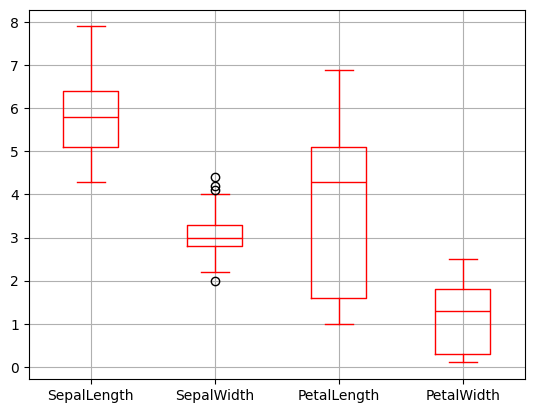

In [35]:
iris.plot(kind='box', color='red')

plt.grid()

> 산점도 그리기

- 2차원, 즉 x축과 y축 그래프에 그려볼 예정

<Axes: xlabel='SepalLength', ylabel='PetalLength'>

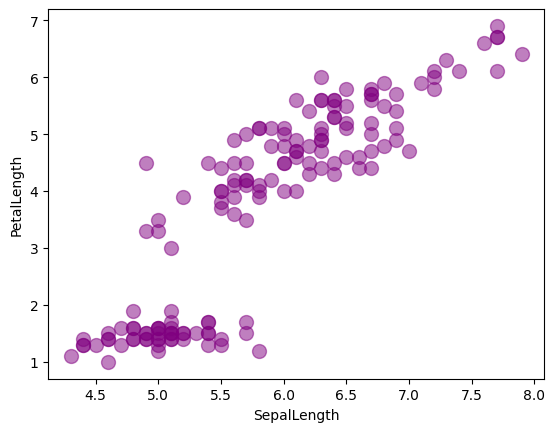

In [46]:
iris.plot(kind='scatter', color='purple',
          x='SepalLength', y='PetalLength',
          s=100, alpha=0.5)

    ✅ kind로 어떤 그래프를 그릴지 선택함에 따라 사용하는 파라미터가 달라질 수 있다는 점을 꼭 기억할 것!